# **Poço Quadrado Finito Duplo**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
import scipy.optimize as opt

In [2]:
# Configurar os valores de entrada
hbar=1
m=1

for a in [1.,2.]:
    z0 = 4*np.pi /2
    V0 = 10 # (z0*hbar/a)**2 /m/2
    z0 = a/hbar * np.sqrt(2*m*V0)
    # V0 = 2*(np.pi*hbar/a)**2 /m/8

    epsilon = 0.0001 # Suficientemente pequeno, mas diferente de zero para evitar problemas de divisão por zero.
    # Configurar as duas equações que precisam ser resolvidas.
    def opt_fun1(z,z0):
        return( np.tan(z) - np.sqrt((z0/z)**2 -1 ))
    def opt_fun2(z,z0):
        return( -1/np.tan(z) - np.sqrt((z0/z)**2 -1 ))

    result = []
    z = []
    Ex = []
    for i in range(2*int(z0/np.pi)+1):
        if i*np.pi/2 < z0:
            if (i%2 == 0):
                result.append(opt.root_scalar(opt_fun1,z0,bracket=[np.pi*i/2+epsilon,min((i+1)*np.pi/2-epsilon,z0)]))
            else:
                result.append(opt.root_scalar(opt_fun2,z0,bracket=[np.pi*i/2+epsilon,min((i+1)*np.pi/2-epsilon,z0)]))
            if not result[i].converged:
                print(result[i])
                z.append(0)
                Ex.append(0)
            else:
                z.append(result[i].root)
                Ex.append((z[i]*hbar/a)**2 /m/2 - V0)
        else:
            z.append(0)
            Ex.append(0)
    print("Potential strenght = {:7.3f}".format(V0))
    print("Largura do poço  = {:7.37}".format(a))
    print("\n As energias de ligação são previstas para serem:")
    for i in range(len(Ex)):
        if Ex[i]<0:print(" Ex[{:1d}] = {:6.3f}".format(i,Ex[i]))
    print()

Potential strenght =  10.000
Largura do poço  =     1.0

 As energias de ligação são previstas para serem:
 Ex[0] = -9.180
 Ex[1] = -6.779
 Ex[2] = -3.054

Potential strenght =  10.000
Largura do poço  =     2.0

 As energias de ligação são previstas para serem:
 Ex[0] = -9.751
 Ex[1] = -9.005
 Ex[2] = -7.773
 Ex[3] = -6.072
 Ex[4] = -3.941



Níveis de energia de ligação para b = 0.000 a: 
E[0] = -9.1810   Ex[0] = -9.7507
E[1] = -6.7818   Ex[1] = -9.0054
E[2] = -3.0596   Ex[2] = -7.7730


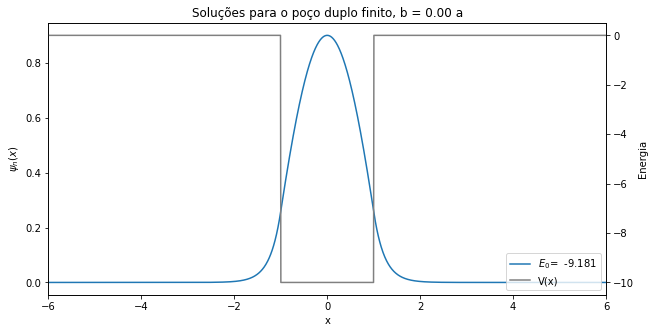

Níveis de energia de ligação para b = 0.800 a: 
E[0] = -7.7588 
E[1] = -7.6546 
E[2] = -2.1491 
E[3] = -1.4423 


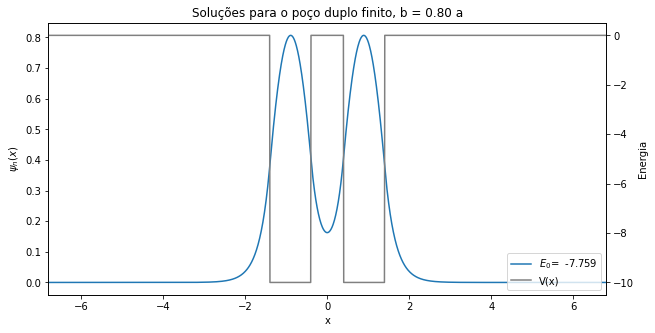

Níveis de energia de ligação para b = 1.600 a: 
E[0] = -7.7090 
E[1] = -7.7044 
E[2] = -1.9337 
E[3] = -1.7909 


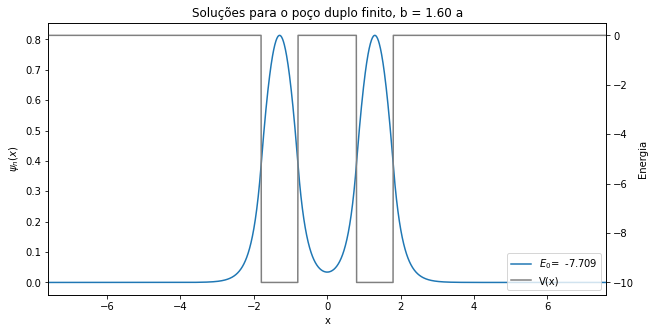

Níveis de energia de ligação para b = 2.400 a: 
E[0] = -7.6829 
E[1] = -7.6827 
E[2] = -1.8201 
E[3] = -1.7887 


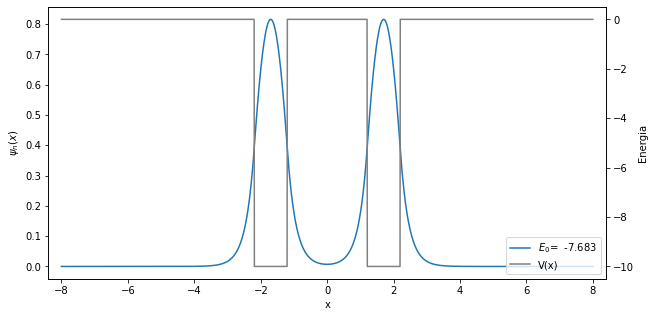

cuidado: a soma a + b está se aproximando muito do limite!
Níveis de energia de ligação para b = 3.200 a: 
E[0] = -7.7067 
E[1] = -7.7067 
E[2] = -1.8705 
E[3] = -1.8641 


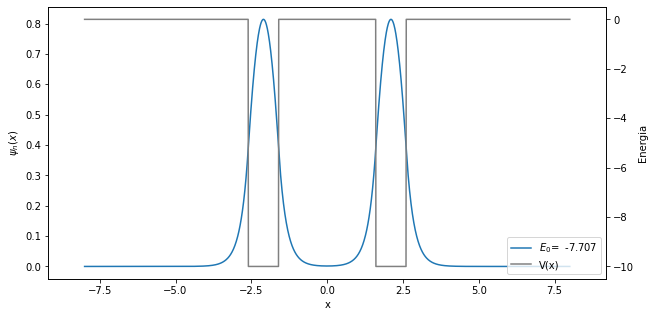

cuidado: a soma a + b está se aproximando muito do limite!
Níveis de energia de ligação para b = 4.000 a: 
E[0] = -7.7067 
E[1] = -7.7067 
E[2] = -1.8680 
E[3] = -1.8666 


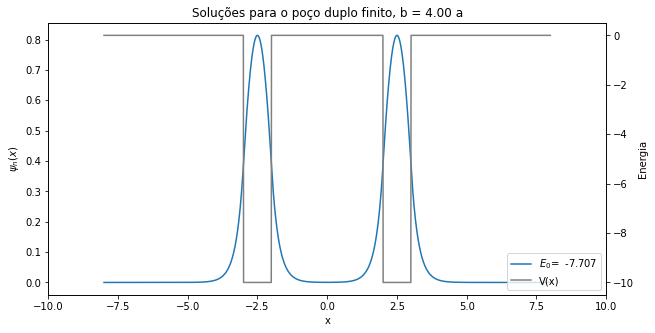

cuidado: a soma a + b está se aproximando muito do limite!
Níveis de energia de ligação para b = 4.800 a: 
E[0] = -7.7067 
E[1] = -7.7067 
E[2] = -1.8675 
E[3] = -1.8672 


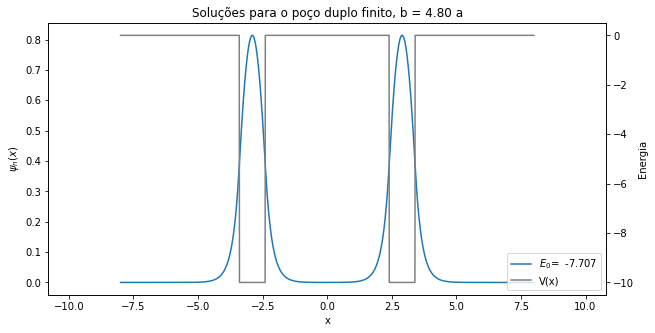

cuidado: a soma a + b está se aproximando muito do limite!
Níveis de energia de ligação para b = 5.600 a: 
E[0] = -7.7067 
E[1] = -7.7067 
E[2] = -1.8674 
E[3] = -1.8673 


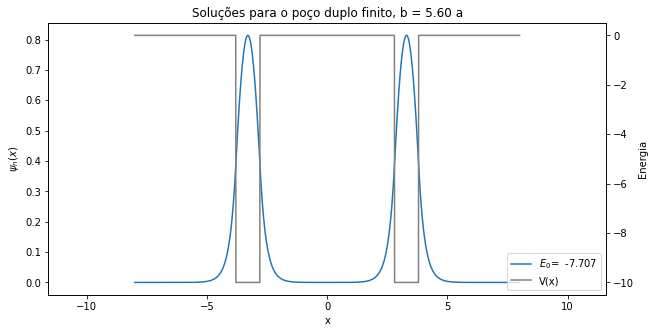

cuidado: a soma a + b está se aproximando muito do limite!
Níveis de energia de ligação para b = 6.400 a: 
E[0] = -7.7067 
E[1] = -7.7067 
E[2] = -1.8673 
E[3] = -1.8673 


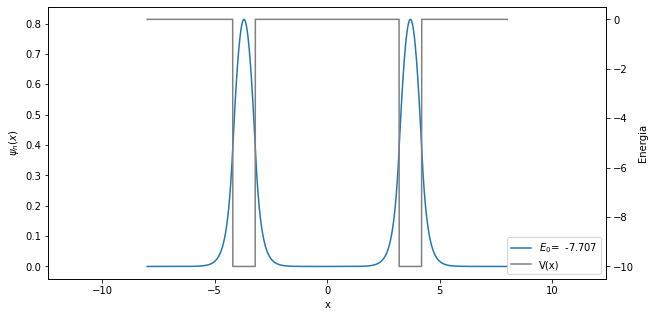

cuidado: a soma a + b está se aproximando muito do limite!
Níveis de energia de ligação para b = 7.200 a: 
E[0] = -7.7067 
E[1] = -7.7067 
E[2] = -1.8673 
E[3] = -1.8673 


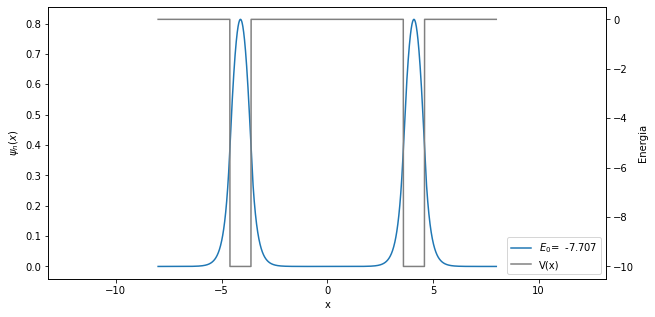

cuidado: a soma a + b está se aproximando muito do limite!
Níveis de energia de ligação para b = 8.000 a: 
E[0] = -7.7067 
E[1] = -7.7067 
E[2] = -1.8673 
E[3] = -1.8673 


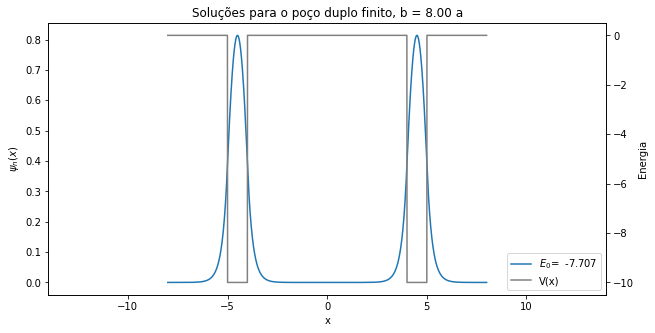

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 2048
x_max = 8
x_min = -x_max

a=1.
b_vals= np.linspace(0,40,11)*a/5 # 1*a
E_store=[]
Psi_store=[]
for b in b_vals:
    if a+b > x_max/2:
        print("cuidado: a soma a + b está se aproximando muito do limite!")
    x = np.linspace(x_min,x_max,N)
    # Queremos armazenar o tamanho do passo, esta é a forma confiável:
    h = x[1]-x[0] # Deve ser igual a 2*np.pi/(N-1)

    # V0 = 2*(np.pi*hbar/a)**2 /m/8


    #
    #
    V=np.zeros(N)
    for i in range(N):
        if x[i] > -a -b/2. and x[i]< -b/2.:
            V[i]= -V0
        elif x[i] > b/2. and x[i] < b/2. + a :
            V[i]= -V0

    Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
    H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V)
    E,psi = np.linalg.eigh(H) # Isso calcula os autovalores e os autovetores
    E_store.append(E)
    Psi_store.append(psi)

    print("Níveis de energia de ligação para b = {:5.3f} a: ".format(b/a))
    for i in range(len(E)):

        if E[i]<0:
            if np.allclose(b,0):
                print("E[{}] = {:7.4f}   Ex[{}] = {:7.4f}".format(i,E[i],i,Ex[i]))
            else:
                print("E[{}] = {:7.4f} ".format(i,E[i]))

    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel("x")
    ax1.set_ylabel("$\psi_n(x)$")
    for i in range(1):
    #    if E[i]<0:                 # Apenas traça os estados ligados. Os estados de espalhamento não são calculados de forma confiável.
            if psi[:,i][N//2+10] < 0:   # Inverte as funções de onda se forem negativas em valores grandes de x, para que os gráficos sejam mais consistentes..
                ax1.plot(x,-psi[:,i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
            else:
                ax1.plot(x,psi[:,i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))

                plt.title("Soluções para o poço duplo finito, b = {:4.2f} a".format(b/a))

    # Trace o poço de potencial em um eixo y separado
    ax2 = ax1.twinx()
    ax2.set_ylabel("Energia")                            # Para obter uma escala de energia separada
    ax2.plot(x,V,color="Gray",label="V(x)")
    ax1.set_xlim((-a-b-5,a+b+5))
    legendh1,labels1 = ax1.get_legend_handles_labels()  # Para colocar todas as legendas em uma única caixa.
    legendh2,labels2 = ax2.get_legend_handles_labels()
    plt.legend(legendh1+legendh2,labels1+labels2,loc="lower right")
    #plt.savefig("Double_Finite_Square_Well_WaveFunctions_b_{}.pdf".format(10*int(b/a)))
    plt.show()